# Preprocesado de los archivos
Los archivos extraídos del analizador de espectro tienen una cobertura mayor ya que la tornamesa va de -190 a +190 grados con lo cual una partecita está superpuesta. También fué girada en distinto sentido en cada medición. El generador de RF fué configurado a 20dBm

El orden el el siguiente

| Número archivo | Polarización | Frecuencia | Pos. inicial | Pos final |
|---------------|--------------|------------|--------------|---------------------|
| 1 | Directa | 3.1GHz | -190 | +190 |
| 2 | Directa | 2.9GHz | +190 | -190 |
| 3 | Directa | 2.7GHz | -190 | +190 |
| 4 | Cruzada | 2.7GHz | -190 | +190 |
| 5 | Cruzada | 2.9GHz | +190 | -190 |
| 6 | Cruzada | 3.1GHz | -190 | +190 |

Preprocesado de archivos para recortar el angulo extra de 10° por lado y espejar las mediciones con la tornamesa en posición inicial positiva y final negativa.<br>
Como el disparo de los instrumentos se hizo a mano me doy un margen de 50° para recortar las mediciónes por desvios de error humano

In [1]:
from scripts.sa_data import SAData, load_sa_data

In [2]:
medicion_1 = load_sa_data('./Mediciones/Originales/1ra med 31Ghz.DAT')
medicion_2 = load_sa_data('./Mediciones/Originales/2da med 29Ghz.DAT')
medicion_3 = load_sa_data('./Mediciones/Originales/3ra med 27Ghz.DAT')
medicion_4 = load_sa_data('./Mediciones/Originales/4ta med 27Ghz.DAT')
medicion_5 = load_sa_data('./Mediciones/Originales/5ta med 29Ghz cruz.DAT')
medicion_6 = load_sa_data('./Mediciones/Originales/6ta med 31Ghz cruz.DAT')
medicion_7 = load_sa_data('./Mediciones/Originales/7ma med piso ruido.DAT')

## Medicion 1: Polarizacion directa, secuencia directa, 3.1GHz

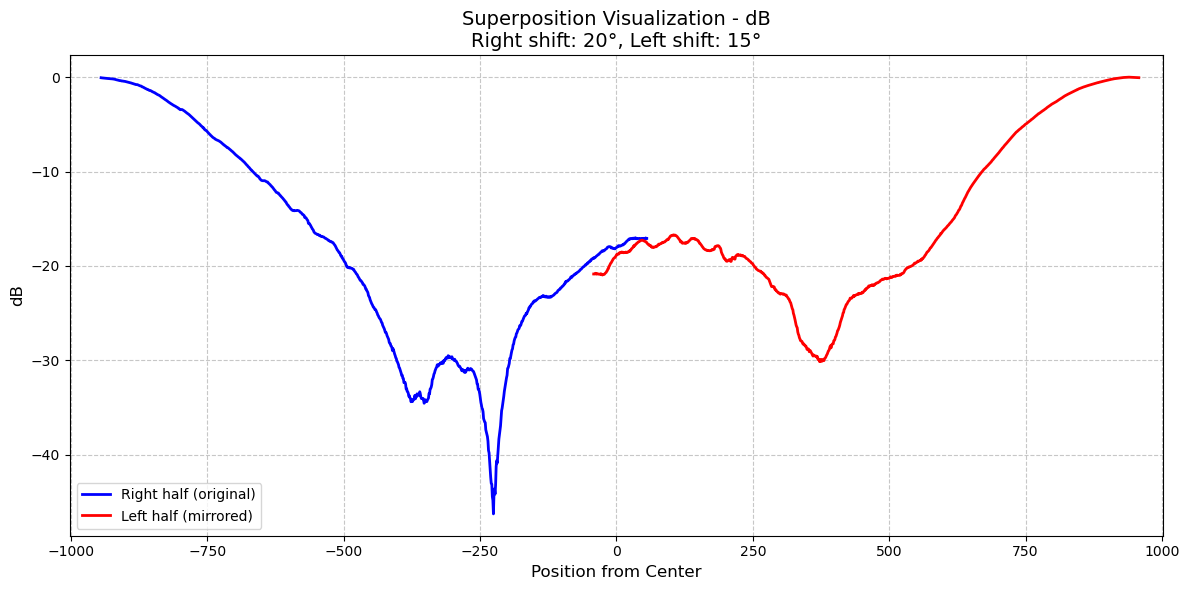

In [3]:
crop_data_1 = medicion_1.plot_superposition(left_shift_deg=15, right_shift_deg=20)

In [4]:
medicion_1.crop_data(**crop_data_1)

{'x': array([ 1.9475,  1.995 ,  2.0425, ..., 92.2925, 92.34  , 92.3875],
       shape=(1905,)),
 'y1': array([-54.7144165 , -54.59428787, -54.60223389, ..., -53.8963089 ,
        -53.8662529 , -53.80072021], shape=(1905,))}

In [5]:
medicion_1.set_output_filename('directa_3.1GHz')

In [6]:
medicion_1.save_processed_data(output_dir='Mediciones/')

'Mediciones/directa_3.1GHz.DAT'

## Medicion 2: Polarizacion directa, secuencia espejada, 2.9GHz

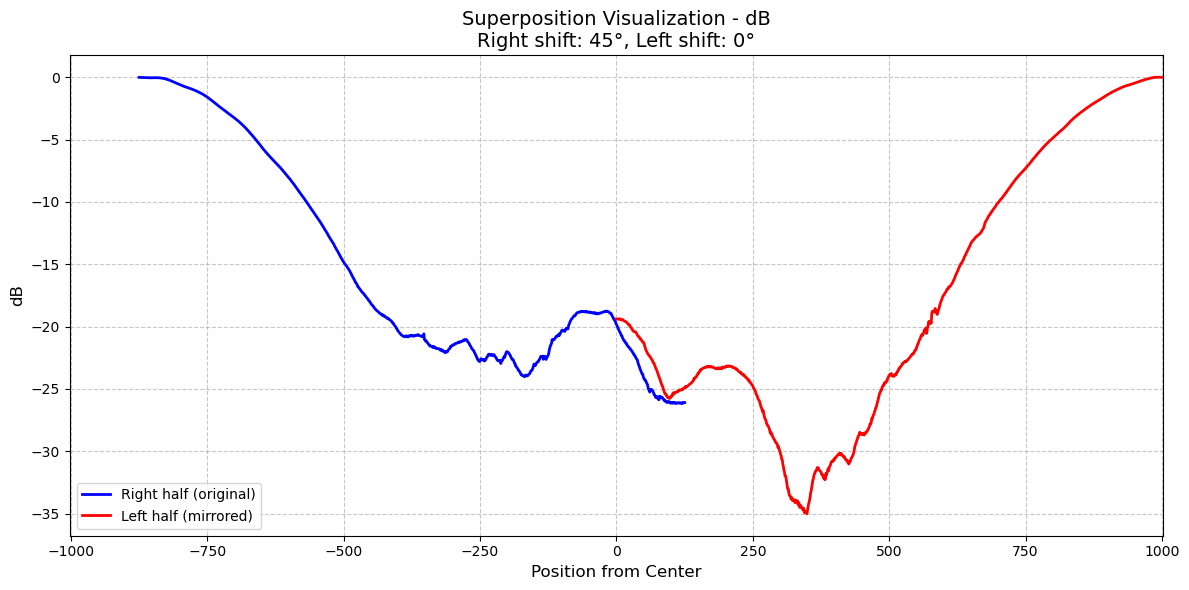

In [7]:
crop_data_2 = medicion_2.plot_superposition(left_shift_deg=0, right_shift_deg=45)

In [8]:
medicion_2.crop_data(**crop_data_2)

{'x': array([0.00000e+00, 4.75000e-02, 9.50000e-02, ..., 8.89675e+01,
        8.90150e+01, 8.90625e+01], shape=(1876,)),
 'y1': array([-53.70814514, -53.70941544, -53.71978378, ..., -53.90973663,
        -54.07009888, -54.15396118], shape=(1876,))}

In [9]:
medicion_2.mirror_data()

{'x': array([0.00000e+00, 4.75000e-02, 9.50000e-02, ..., 9.49050e+01,
        9.49525e+01, 9.50000e+01], shape=(2001,)),
 'y1': array([-60.40646744, -60.40720367, -60.41163635, ..., -53.71978378,
        -53.70941544, -53.70814514], shape=(2001,))}

In [10]:
medicion_2.set_output_filename('directa_2.9GHz')

In [11]:
medicion_2.save_processed_data(output_dir='Mediciones/')

'Mediciones/directa_2.9GHz.DAT'

## Medicion 3: Polarizacion directa, secuencia directa, 2.7GHz

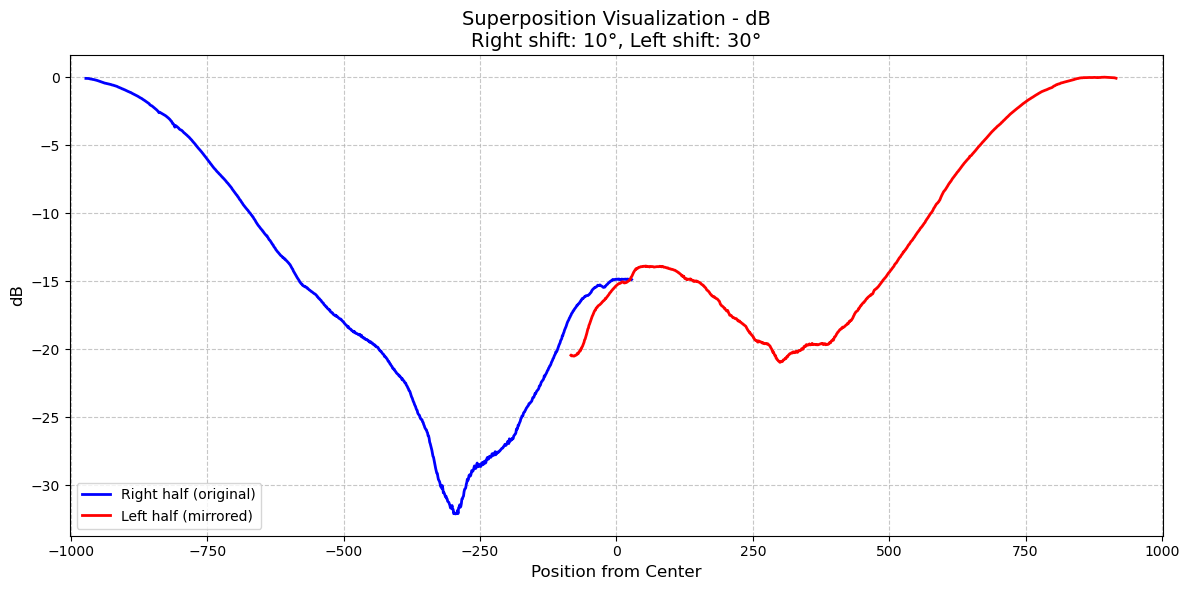

In [12]:
crop_data_3 = medicion_3.plot_superposition(left_shift_deg=30, right_shift_deg=10)

In [13]:
medicion_3.crop_data(**crop_data_3)

{'x': array([ 3.9425,  3.99  ,  4.0375, ..., 93.6225, 93.67  , 93.7175],
       shape=(1891,)),
 'y1': array([-48.39679337, -48.3706398 , -48.33576965, ..., -47.9255867 ,
        -47.92649841, -47.93655014], shape=(1891,))}

In [14]:
medicion_3.set_output_filename('directa_2.7GHz')

In [15]:
medicion_3.save_processed_data(output_dir='Mediciones/')

'Mediciones/directa_2.7GHz.DAT'

## Medicion 4: Polarizacion cruzada, secuencia directa, 2.7GHz

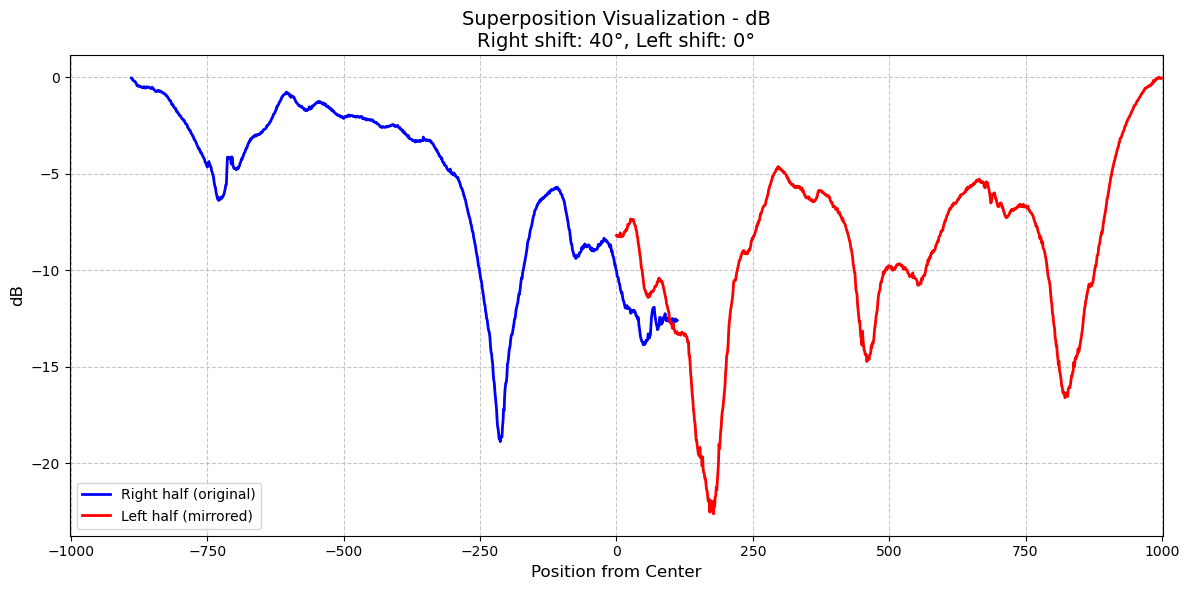

In [16]:
crop_data_4 = medicion_4.plot_superposition(left_shift_deg=0, right_shift_deg=40)

In [17]:
medicion_4.crop_data(**crop_data_4)

{'x': array([0.00000e+00, 4.75000e-02, 9.50000e-02, ..., 8.96325e+01,
        8.96800e+01, 8.97275e+01], shape=(1890,)),
 'y1': array([-59.12034607, -59.16270828, -59.11628342, ..., -60.6785202 ,
        -60.86803436, -60.94851303], shape=(1890,))}

In [18]:
medicion_4.set_output_filename('cruzada_2.7GHz')

In [19]:
medicion_4.save_processed_data(output_dir='Mediciones/')

'Mediciones/cruzada_2.7GHz.DAT'

## Medicion 5: Polarizacion cruzada, secuencia espejada, 2.9GHz

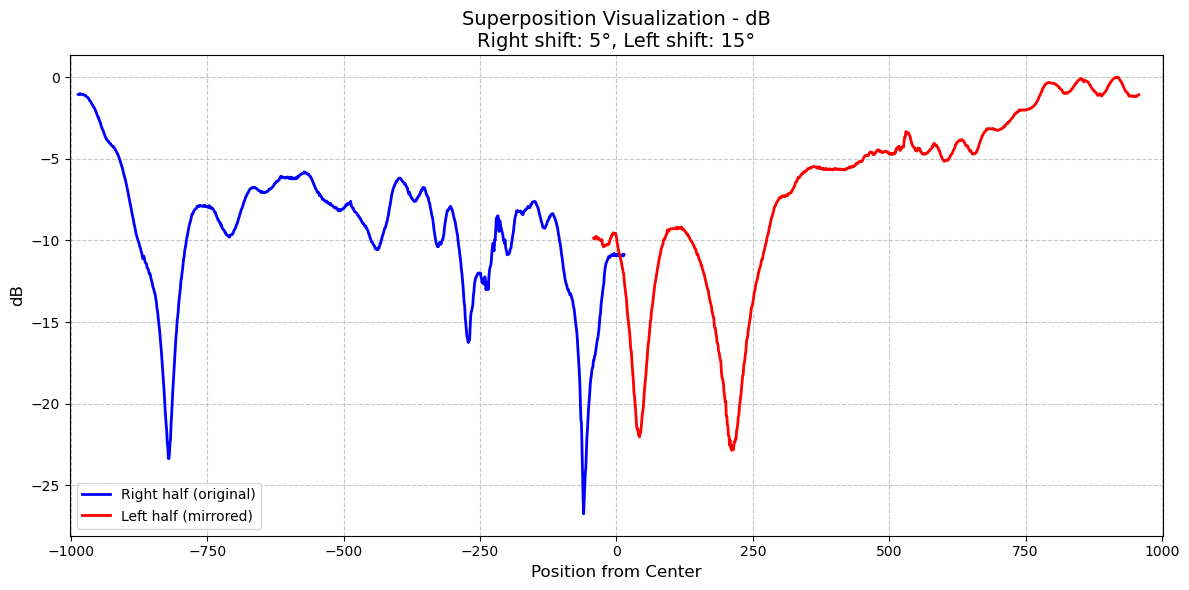

In [20]:
crop_data_5 = medicion_5.plot_superposition(left_shift_deg=15, right_shift_deg=5)

In [21]:
medicion_5.crop_data(**crop_data_5)

{'x': array([ 1.9475,  1.995 ,  2.0425, ..., 94.2875, 94.335 , 94.3825],
       shape=(1947,)),
 'y1': array([-59.12213135, -59.30979156, -59.59534454, ..., -60.37609863,
        -60.39596558, -60.3176918 ], shape=(1947,))}

In [22]:
medicion_5.mirror_data()

{'x': array([0.00000e+00, 4.75000e-02, 9.50000e-02, ..., 9.49050e+01,
        9.49525e+01, 9.50000e+01], shape=(2001,)),
 'y1': array([-60.31386185, -60.40831375, -60.31750488, ..., -59.35602951,
        -59.36275482, -59.30554199], shape=(2001,))}

In [23]:
medicion_5.set_output_filename('cruzada_2.9GHz')

In [24]:
medicion_5.save_processed_data(output_dir='Mediciones/')

'Mediciones/cruzada_2.9GHz.DAT'

## Medicion 6: Polarizacion cruzada, secuencia directa, 3.1GHz

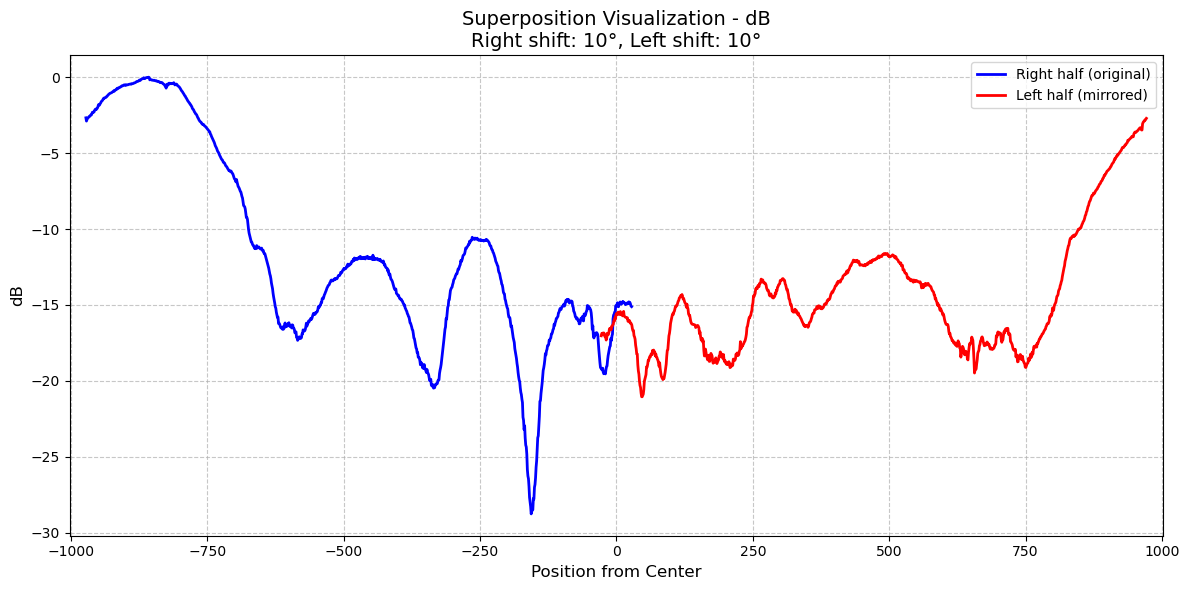

In [25]:
crop_data_6 = medicion_6.plot_superposition(left_shift_deg=10, right_shift_deg=10)

In [26]:
medicion_6.crop_data(**crop_data_6)

{'x': array([ 1.2825,  1.33  ,  1.3775, ..., 93.6225, 93.67  , 93.7175],
       shape=(1947,)),
 'y1': array([-63.57043076, -63.49159241, -63.55263138, ..., -62.98127747,
        -63.02935791, -62.97415161], shape=(1947,))}

In [27]:
medicion_6.set_output_filename('cruzada_3.1GHz')

In [28]:
medicion_6.save_processed_data(output_dir='Mediciones/')

'Mediciones/cruzada_3.1GHz.DAT'

## Medicion 7 Piso de ruido

Copio directamente archivo renombrandolo a `piso_ruido.DAT`